## Goal of this Notebook
We want to look observe the conditional probability of a week's movement given the previous two weeks.

For the same reasons as stated in the previous notebook, we will be using the four movement categories instead of the eight.

I'm curious to see if the three day momentum and three week momentum follow the same trends

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('stock_data/nvda.csv')
weekly_movements = get_price_movements(df, period=7)

In [3]:
movement_categories = categorize_movements(weekly_movements, n_cats=4)

In [4]:
movement_categories[1:10]

['bd', 'bg', 'sd', 'sg', 'sg', 'sd', 'bd', 'bd', 'sg']

In [5]:
bd_count = count_movement_category(movement_categories, 'bd')
sd_count = count_movement_category(movement_categories, 'sd')
sg_count = count_movement_category(movement_categories, 'sg')
bg_count = count_movement_category(movement_categories, 'bg')

total_cat_count = len(movement_categories)

p_bd = bd_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_bg = bg_count / total_cat_count

cat_counts = [bd_count, sd_count, sg_count, bg_count]
cat_probs = [p_bd, p_sd, p_sg, p_bg]

In [6]:
[print(i) for i in cat_probs]

0.12534818941504178
0.403899721448468
0.362116991643454
0.10863509749303621


[None, None, None, None]

In [7]:
three_week_trends = get_trends(movement_categories, 3)

Let's check to make sure there are len(movement_categories) - 2 three_week_trends.  
Let's also have a look at the number of times different trends appear

In [8]:
total = 0
all_categories = ['bd', 'sd', 'sg', 'bg']

for first_category in all_categories:
    for second_category in all_categories:
        for third_category in all_categories:
            trend_name = first_category + '_' + second_category + '_' + third_category
            three_week_trend_count = count_trends(three_week_trends, trend_name)
            print('The count for ' + trend_name + ' is: ' + str(three_week_trend_count))
            total += three_week_trend_count

print('The total is: ' + str(total))

The count for bd_bd_bd is: 1
The count for bd_bd_sd is: 2
The count for bd_bd_sg is: 4
The count for bd_bd_bg is: 3
The count for bd_sd_bd is: 3
The count for bd_sd_sd is: 2
The count for bd_sd_sg is: 6
The count for bd_sd_bg is: 2
The count for bd_sg_bd is: 1
The count for bd_sg_sd is: 9
The count for bd_sg_sg is: 2
The count for bd_sg_bg is: 1
The count for bd_bg_bd is: 3
The count for bd_bg_sd is: 2
The count for bd_bg_sg is: 2
The count for bd_bg_bg is: 2
The count for sd_bd_bd is: 5
The count for sd_bd_sd is: 3
The count for sd_bd_sg is: 3
The count for sd_bd_bg is: 1
The count for sd_sd_bd is: 5
The count for sd_sd_sd is: 29
The count for sd_sd_sg is: 19
The count for sd_sd_bg is: 6
The count for sd_sg_bd is: 5
The count for sd_sg_sd is: 27
The count for sd_sg_sg is: 21
The count for sd_sg_bg is: 5
The count for sd_bg_bd is: 1
The count for sd_bg_sd is: 6
The count for sd_bg_sg is: 7
The count for sd_bg_bg is: 1
The count for sg_bd_bd is: 2
The count for sg_bd_sd is: 4
The count 

## Two week trends and bar graphs
It's helpful to assess whether looking back an extra time step is worth it

In [9]:
two_week_trends = get_trends(movement_categories, 2)

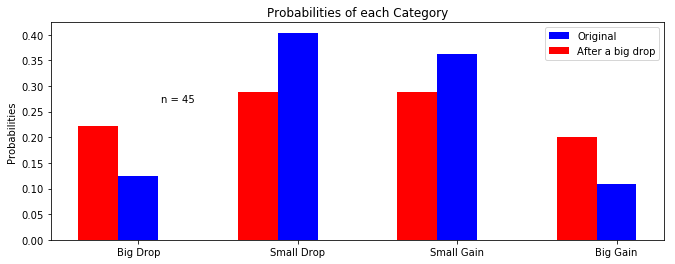

In [10]:
plot_two_day_probability_bar_graph('bd', bd_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

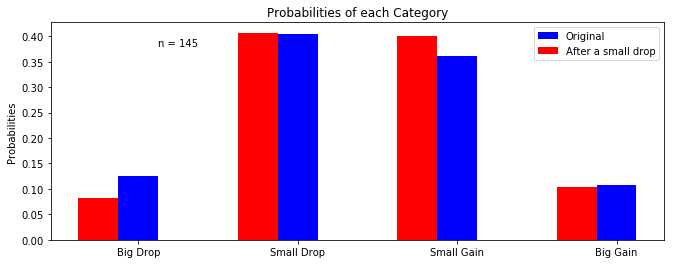

In [11]:
plot_two_day_probability_bar_graph('sd', sd_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

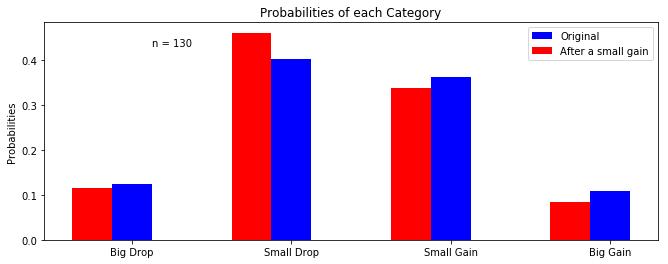

In [12]:
plot_two_day_probability_bar_graph('sg', sg_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

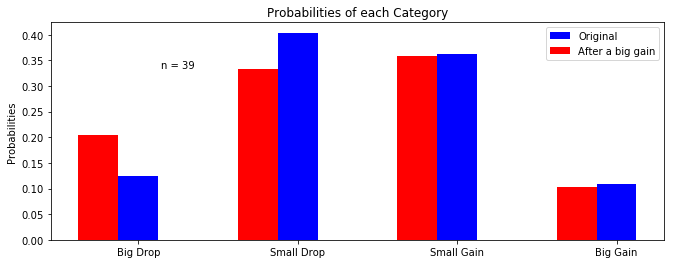

In [13]:
plot_two_day_probability_bar_graph('bg', bg_count, two_week_trends, cat_probs, n_cats=4)
plt.show()

### The skinny bars give the added context of looking an extra week back
#### The blue bar is the conditional probability of looking back one week. The black bar is the probability on any given week

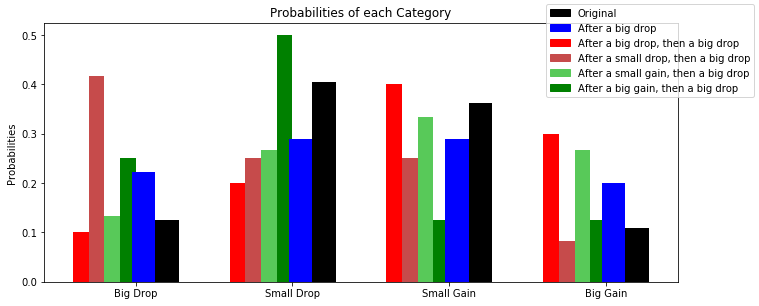

In [14]:
plot_three_day_probability_bar_graph('bd', two_week_trends, three_week_trends, movement_categories)
plt.show()

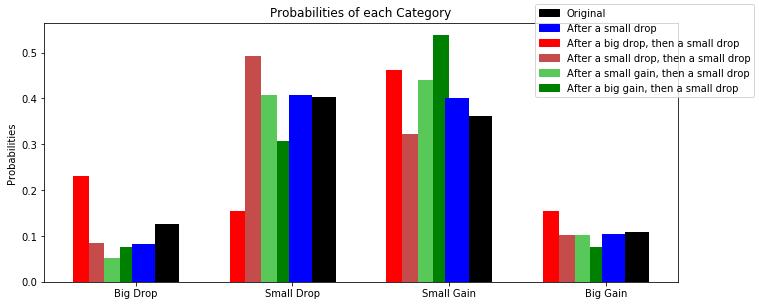

In [15]:
plot_three_day_probability_bar_graph('sd', two_week_trends, three_week_trends, movement_categories)
plt.show()

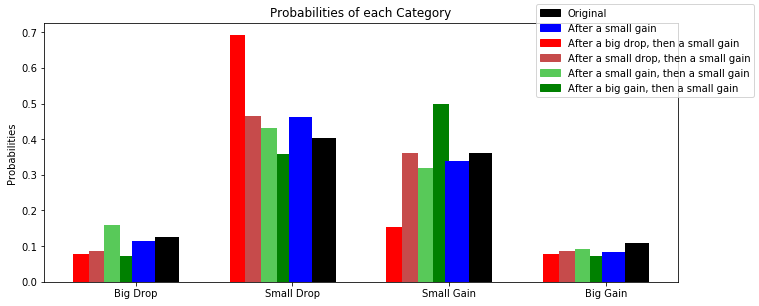

In [16]:
plot_three_day_probability_bar_graph('sg', two_week_trends, three_week_trends, movement_categories)
plt.show()

^^^^^^^^^^^^ That's a really cool one (I wonder how many times that's happened?)

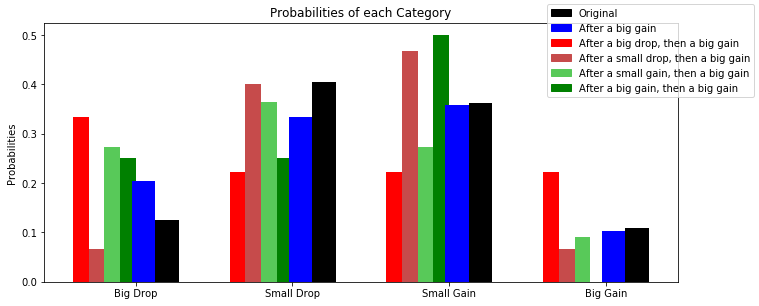

In [17]:
plot_three_day_probability_bar_graph('bg', two_week_trends, three_week_trends, movement_categories)
plt.show()

### It should be evident by now  that looking back an extra week is pretty informative.
However, we should note that the number of data points for these distributions are very small, especially for the more unlikley/extreme combinations.

# SPY

In [18]:
df = pd.DataFrame()
df = df.from_csv('stock_data/spy.csv')
weekly_movements = get_price_movements(df, period=7)

movement_categories = categorize_movements(weekly_movements, n_cats=4)
#category_probabilities = get_category_probabilities(movement_categories)

two_week_trends = get_trends(movement_categories, 2)
three_week_trends = get_trends(movement_categories, 3)

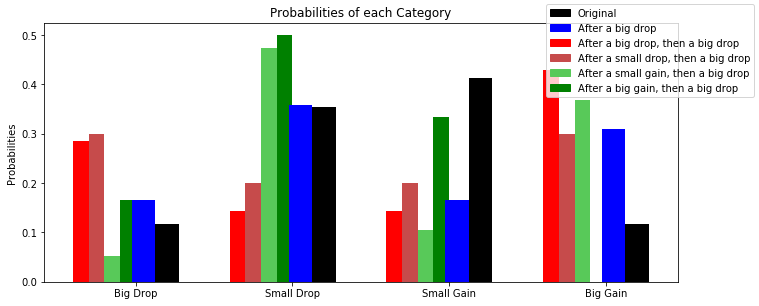

In [19]:
plot_three_day_probability_bar_graph('bd', two_week_trends, three_week_trends, movement_categories)
plt.show()

#### Also interesting. 
When looking at daily movements, big gain -> big drop -> big gain is not uncommon. However it doesn't really happen on a weekly level ever for SPY.  
It makes sense though -- this type of bounce would indicate instability and an erratic market.

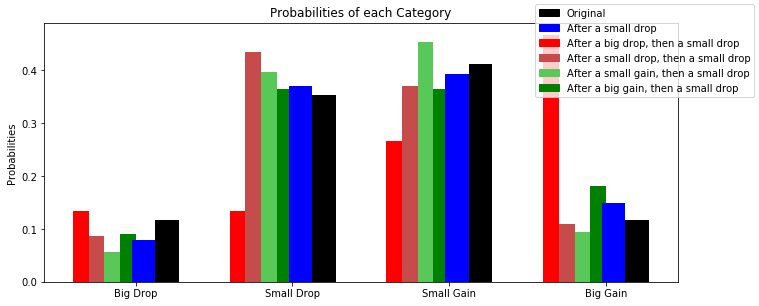

In [20]:
plot_three_day_probability_bar_graph('sd', two_week_trends, three_week_trends, movement_categories)
plt.show()

This is interesting, big drop followed by a small drop is a good time to go in.


Also, just as a simple trade idea, buying SPY calls after small gain -> small drop seems like a good move. (As well as for the above case)

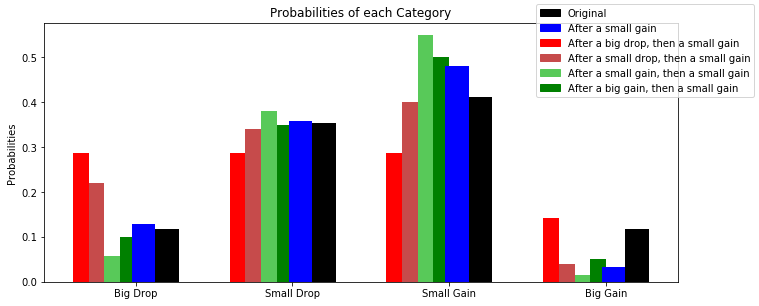

In [21]:
plot_three_day_probability_bar_graph('sg', two_week_trends, three_week_trends, movement_categories)
plt.show()

#### Small gains have stellar momentum!

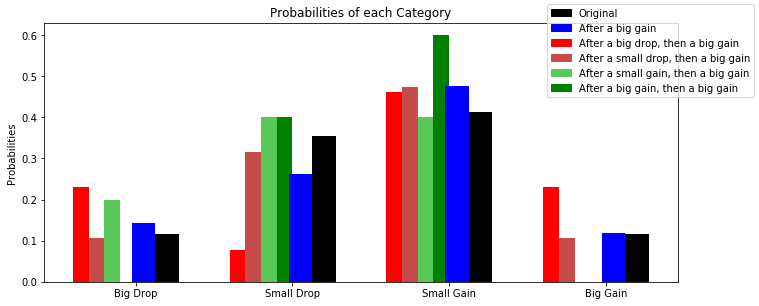

In [22]:
plot_three_day_probability_bar_graph('bg', two_week_trends, three_week_trends, movement_categories)
plt.show()

After two weeks of big gains, you can sell OTM puts and calls, especially since IV might be pretty high.

## All Stocks
#### Get the average behavior over all stocks

In [24]:
(all_two_week_trends, _, _, all_movement_categories) = get_trends_all_stocks(7, 2, ['bd', 'sd', 'sg', 'bd'], n_cats=4)

In [25]:
(all_three_week_trends, _, _, _) = get_trends_all_stocks(7, 3, ['bd', 'sd', 'sg', 'bd'], n_cats=4)

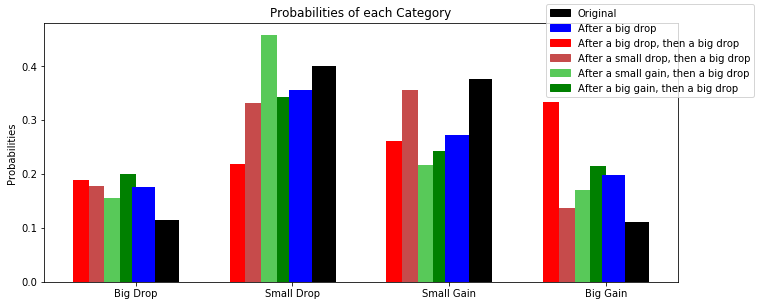

In [26]:
plot_three_day_probability_bar_graph('bd', all_two_week_trends, all_three_week_trends, all_movement_categories)
plt.show()

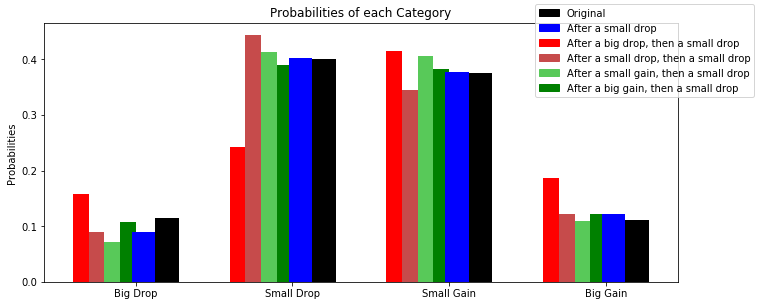

In [27]:
plot_three_day_probability_bar_graph('sd', all_two_week_trends, all_three_week_trends, all_movement_categories)
plt.show()

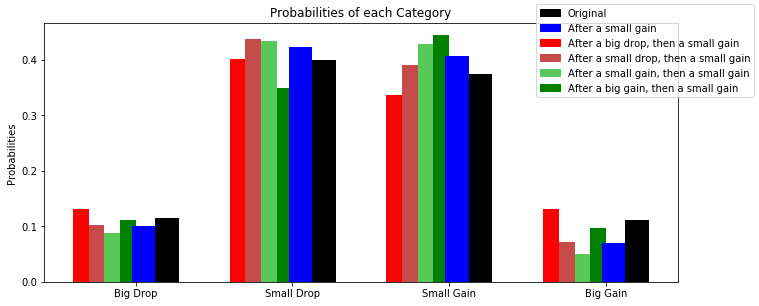

In [28]:
plot_three_day_probability_bar_graph('sg', all_two_week_trends, all_three_week_trends, all_movement_categories)
plt.show()

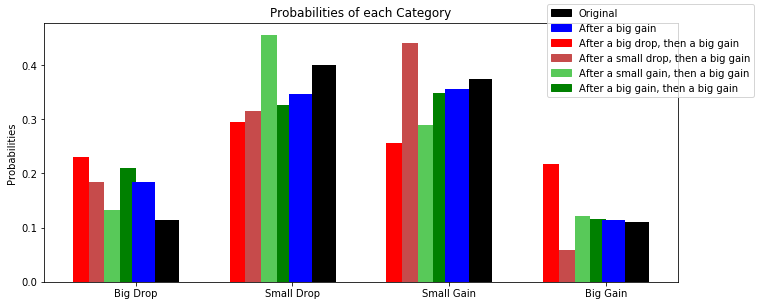

In [29]:
plot_three_day_probability_bar_graph('bg', all_two_week_trends, all_three_week_trends, all_movement_categories)
plt.show()

It looks like there are stronger trends, on average, over weeks than over days.